In [18]:
import os
import re
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
shap_files = [f for f in os.listdir('data/shap') if 'shap' in f]

In [5]:
print(f"There are {len(shap_files)} files of shap data.")

There are 59 files of shap data.


In [19]:
file_nums = []
for i in range(0, len(shap_files)):
    file_nums.append(int(re.search(r'\d+', shap_files[i]).group(0)))

In [21]:
X = pd.read_csv(f"data/shap/x_0.csv")

for i in file_nums:
    if i != 0:
        new = pd.read_csv(f"data/shap/x_{i}.csv")
        X = pd.concat([X, new])

In [22]:
shap_values = np.load(f'data/shap/shap_values_0.npy')

for i in file_nums:
    if i != 0:
        new = np.load(f'data/shap/shap_values_{i}.npy')
        shap_values = np.concatenate([shap_values, new])

In [23]:
print("SHAP value shape:", shap_values.shape)
print("X shape:", X.shape)

SHAP value shape: (68617, 27)
X shape: (68617, 27)


In [24]:
def prep_plot_data(var_to_plot, feature_data, shap_data):
    
    idx = np.where(feature_data.columns==var_to_plot)[0][0]

    plot_data = pd.DataFrame()
    plot_data.loc[:, var_to_plot] = feature_data[var_to_plot]
    plot_data.loc[:, 'public'] = feature_data['public']
    plot_data.loc[:, 'shap_value'] = shap_data[:,idx]
    
    return plot_data

In [28]:
def plot_interaction_dependence_plot(main_var, var_name):
    # prep data
    data = prep_plot_data(main_var, X, shap_values)

    # set up image and axes
    fig = plt.figure(figsize=(12, 8))

    gs = gridspec.GridSpec(5, 5)
    ax_main = plt.subplot(gs[1:5, :5])
    ax_xDist = plt.subplot(gs[0, :5])

    # scatter
    sns.scatterplot(
        x=main_var,
        y='shap_value',
        data=data.loc[data['public']== 0],
        color='#7F7EF7',
        alpha=0.5,
        ax=ax_main
    )
    sns.scatterplot(
        x=main_var,
        y='shap_value',
        data=data.loc[data['public']== 1],
        color='#F07E7E',
        alpha=0.5,
        ax=ax_main
    )

    # lowess (plotting separately for visibility)
    sns.regplot(
        x=main_var,
        y='shap_value',
        data=data.loc[data['public']== 0],
        lowess=True,
        scatter=False,
        color='blue',
        label='Private',
        ax=ax_main
    )
    sns.regplot(
        x=main_var,
        y='shap_value',
        data=data.loc[data['public']== 1],
        lowess=True,
        scatter=False,
        color='red',
        label='Public',
        ax=ax_main
    )

    # add legend and labels
    ax_main.legend(['Public', 'Private'], fontsize=12, loc='upper right')
    ax_main.set_xlabel(var_name, fontsize=14)
    ax_main.set_ylabel('Job Satisfaction', fontsize=14)

    # histplot
    ax_xDist.hist(
        data.loc[data['public'] == 0, main_var],
        bins=50,
        edgecolor="black",
        color="blue",
        alpha=0.5
    )
    ax_xDist.hist(
        data.loc[data['public'] == 1, main_var],
        bins=50,
        edgecolor="black",
        color="red",
        alpha=0.5
    )

    plt.show()

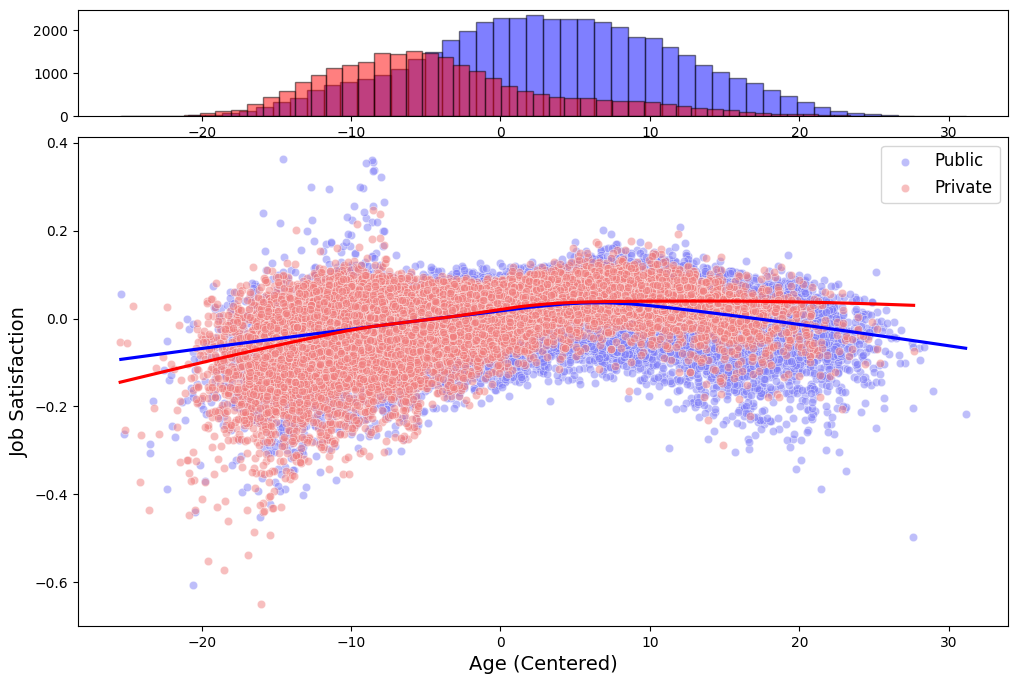

In [29]:
plot_interaction_dependence_plot(
    main_var = 'avg_age_per_job_centered',
    var_name = 'Age (Centered)')

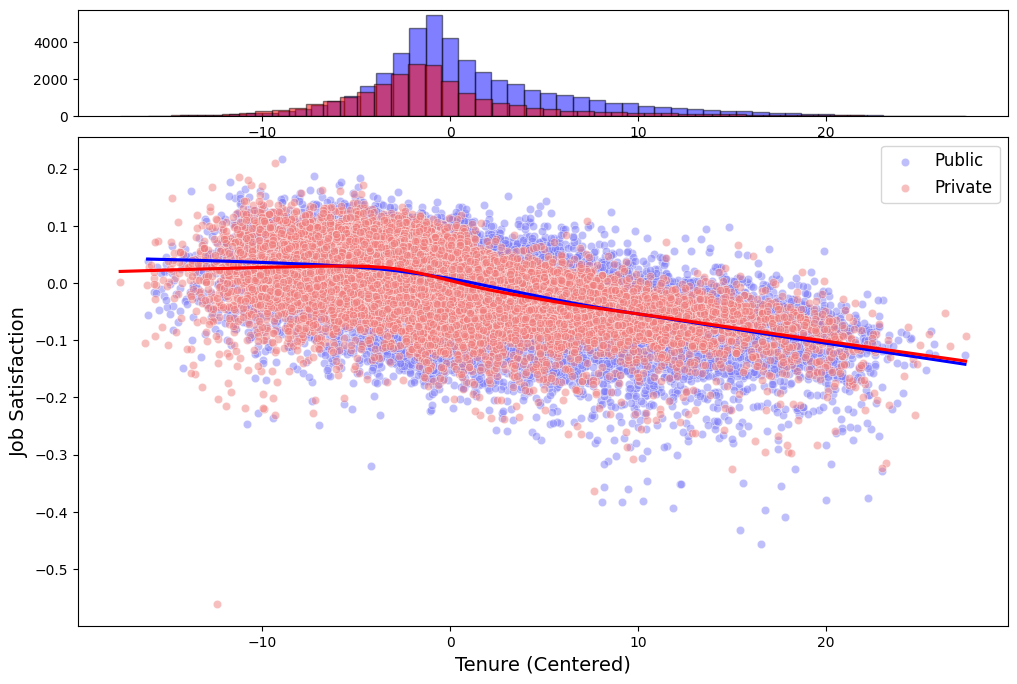

In [30]:
plot_interaction_dependence_plot(
    main_var = 'tenure_centered',
    var_name = 'Tenure (Centered)')